In [1]:
%matplotlib ipympl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import keras
print(tf. __version__)
print(keras.__version__)

2.10.0
2.10.0


In [2]:
train_url = 'https://raw.githubusercontent.com/Tim0n1/MLDL_zapiski/master/train.csv'
test_url_X = 'https://raw.githubusercontent.com/Tim0n1/MLDL_zapiski/master/test.csv'
test_url_y = 'https://raw.githubusercontent.com/Tim0n1/MLDL_zapiski/master/gender_submission.csv'

In [3]:
train_df = pd.read_csv(train_url)
testX_df = pd.read_csv(test_url_X)
testy_df = pd.read_csv(test_url_y)

In [4]:

train_X = train_df.drop(columns=['Survived','PassengerId','Name','Ticket', 'Embarked','Fare'])
train_X.loc[train_X['Sex'] == 'male' , ['Sex']] = 1
train_X.loc[train_X['Sex'] == 'female' , ['Sex']] = 0
train_X = train_X.fillna(0)
train_X.loc[train_X['Cabin'] != 0, ['Cabin']] = 1
print(train_X.shape)
train_y = train_df['Survived']
print(train_y.shape)
test_X = testX_df.drop(columns=['PassengerId','Name','Ticket', 'Embarked','Fare'])
test_X.loc[test_X['Sex'] == 'male' , ['Sex']] = 1
test_X.loc[test_X['Sex'] == 'female' , ['Sex']] = 0
test_X = test_X.fillna(0)
test_X.loc[test_X['Cabin'] != 0, ['Cabin']] = 1
print(test_X)
test_y = testy_df['Survived']

(891, 6)
(891,)
     Pclass  Sex   Age  SibSp  Parch Cabin
0         3    1  34.5      0      0     0
1         3    0  47.0      1      0     0
2         2    1  62.0      0      0     0
3         3    1  27.0      0      0     0
4         3    0  22.0      1      1     0
..      ...  ...   ...    ...    ...   ...
413       3    1   0.0      0      0     0
414       1    0  39.0      0      0     1
415       3    1  38.5      0      0     0
416       3    1   0.0      0      0     0
417       3    1   0.0      1      1     0

[418 rows x 6 columns]


In [5]:
input_shape = train_X.shape

In [6]:
train_X.to_numpy()
train_y.to_numpy()
test_X.to_numpy()
test_y.to_numpy()

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [7]:
train_X = np.asarray(train_X).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
test_X = np.asarray(test_X).astype(np.float32)
test_y = np.asarray(test_y).astype(np.float32)

In [8]:
print((train_X))
print(len(train_y))

[[ 3.  1. 22.  1.  0.  0.]
 [ 1.  0. 38.  1.  0.  1.]
 [ 3.  0. 26.  0.  0.  0.]
 ...
 [ 3.  0.  0.  1.  2.  0.]
 [ 1.  1. 26.  0.  0.  1.]
 [ 3.  1. 32.  0.  0.  0.]]
891


In [9]:
train_X = train_X.reshape(891,6)
train_y = train_y.reshape(891)
test_X = test_X.reshape(418,6)
test_y = test_y.reshape(418)

In [10]:
train_X.shape, train_y.shape

((891, 6), (891,))

In [11]:
test_X.shape, test_y.shape

((418, 6), (418,))

In [12]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_dim=train_X.shape[1], activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(train_X, train_y, epochs=50,batch_size=6, validation_data=(test_X, test_y), verbose=1)

Epoch 1/50
149/149 [==============================] - 1s 3ms/step - loss: 1.1073 - accuracy: 0.6117 - val_loss: 0.6436 - val_accuracy: 0.6340
Epoch 2/50
149/149 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.6240 - val_loss: 0.6179 - val_accuracy: 0.7488
Epoch 3/50
149/149 [==============================] - 0s 1ms/step - loss: 0.6143 - accuracy: 0.6588 - val_loss: 0.5904 - val_accuracy: 0.7584
Epoch 4/50
149/149 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.6667 - val_loss: 0.5686 - val_accuracy: 0.7344
Epoch 5/50
149/149 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.6914 - val_loss: 0.5497 - val_accuracy: 0.6986
Epoch 6/50
149/149 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.7228 - val_loss: 0.5096 - val_accuracy: 0.7584
Epoch 7/50
149/149 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.7284 - val_loss: 0.4803 - val_accuracy: 0.7679
Epoch 

In [15]:
model.save('model_data')

INFO:tensorflow:Assets written to: model_data\assets


In [16]:
model = keras.models.load_model('model_data')

In [139]:

def get_predicted_survivors(x):
    predicted_survivors = []
    model_prediction = model.predict(test_X[:])
    for n, i in enumerate(model_prediction):
        if (i[0] >= x-0.1) and (i[0] <= x+0.1):
            predicted_survivors.append(n)
            #print(n,i[0])
    return predicted_survivors

## Do some statistic about the prediction accuracy of the model

In [26]:
print(get_predicted_survivors(0.555))


14/14 [==============================] - 0s 1ms/step
[1, 4, 6, 8, 12, 14, 15, 18, 19, 21, 22, 24, 26, 32, 36, 37, 43, 44, 48, 49, 52, 53, 59, 63, 65, 66, 69, 70, 72, 74, 77, 79, 80, 86, 87, 88, 89, 90, 92, 96, 98, 100, 104, 111, 112, 113, 114, 117, 119, 120, 122, 125, 127, 138, 141, 150, 153, 156, 157, 159, 160, 161, 162, 165, 168, 169, 175, 176, 178, 179, 182, 184, 186, 192, 194, 196, 197, 199, 200, 201, 203, 206, 208, 213, 216, 218, 220, 222, 224, 227, 231, 238, 239, 240, 241, 246, 248, 249, 250, 258, 262, 263, 268, 272, 273, 275, 280, 281, 282, 283, 284, 291, 296, 304, 305, 307, 309, 313, 314, 315, 324, 326, 330, 333, 343, 344, 345, 347, 349, 350, 356, 359, 361, 362, 364, 367, 368, 371, 374, 375, 376, 382, 383, 385, 391, 392, 395, 397, 400, 402, 408, 409, 410, 411, 412, 414, 417]


In [27]:
y = []
x = np.linspace(0,1,num=100)
n_1_l = []
for i in x:
    n_1 = 0
    predicted_val = test_y[get_predicted_survivors(i)]
    for i in predicted_val:
        if i == 1:
            n_1 += 1
    print(n_1)
    accuracy = predicted_val.mean()
    n_1_l.append(n_1)
    y.append(accuracy)
print(y)


14/14 [==============================] - 0s 891us/step
152
14/14 [==============================] - 0s 2ms/step
150
14/14 [==============================] - 0s 2ms/step
150
14/14 [==============================] - 0s 769us/step
150
14/14 [==============================] - 0s 1ms/step
150
14/14 [==============================] - 0s 2ms/step
150
14/14 [==============================] - 0s 397us/step
150
14/14 [==============================] - 0s 1ms/step
149
14/14 [==============================] - 0s 833us/step
149
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 416us/step
148
14/14 [==============================] - 0s 1ms/step
148
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 790us/step
148
14/14 [==============================] - 0s 2ms/step
148
14/14 [==============================] - 0s 967us/step
148
14/14 [==============================] - 0s 386us/step
148
14/14 [========

C:\Users\timon\AppData\Local\Temp\ipykernel_19652\893535988.py:11: RuntimeWarning: Mean of empty slice.
  accuracy = predicted_val.mean()
D:\Anaconda\envs\DL\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


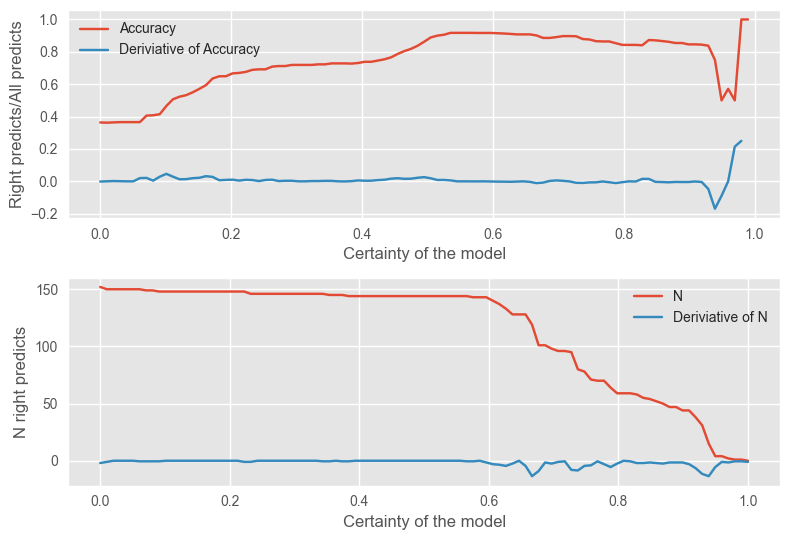

In [36]:
#%matplotlib ipympl
%matplotlib inline
fig, ax = plt.subplots(2,1)
ax[0].plot(x, y, label='Accuracy')
#plt.plot(x, n_1_l)
#plt.plot(x, np.gradient(n_1_l))
ax[0].plot(x, np.gradient(y), label='Deriviative of Accuracy')
ax[0].set_xlabel('Certainty of the model')
ax[0].set_ylabel('Right predicts/All predicts')
ax[0].legend()
ax[1].plot(x, n_1_l, label='N')
ax[1].plot(x, np.gradient(n_1_l), label='Deriviative of N')
ax[1].set_xlabel('Certainty of the model')
ax[1].set_ylabel('N right predicts')
ax[1].legend()
plt.style.use('ggplot')
fig.tight_layout()

In [29]:
fig.savefig('prediction_analysis.png')

## Inserting with custom data

In [145]:
test_input = [3,1,40,0,0,1]
def get_potential_survive_chance(input):
    input = np.array(input)
    input.resize(1,6)
    prediction = model.predict(input)
    print(prediction)
    prediction = prediction[0,0]
    chance = test_y[get_predicted_survivors(prediction)].mean()
    if chance == np.nan:
        chance = prediction
        print(prediction)
    print(get_predicted_survivors(prediction))
    print(test_y[get_predicted_survivors(prediction)])
    print(chance)
    return np.round(chance*100, 2)
print(get_potential_survive_chance(test_input))

1/1 [==============================] - 0s 17ms/step
[[0.24384226]]
14/14 [==============================] - 0s 1ms/step
[5, 7, 11, 16, 20, 23, 33, 51, 57, 61, 67, 78, 82, 94, 101, 137, 142, 143, 144, 148, 180, 185, 189, 190, 191, 198, 204, 205, 207, 212, 217, 229, 230, 244, 264, 266, 276, 277, 278, 279, 290, 298, 301, 317, 321, 323, 327, 328, 329, 336, 338, 340, 346, 348, 351, 352, 354, 369, 370, 377, 389, 401, 403, 406]
14/14 [==============================] - 0s 498us/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
0.03125
3.12


In [146]:
#todo the function needs more research